## M Kevin Alrahmanto

## Teacher : Sandeep Kumar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats, proportion, oneway
from scipy.stats import norm, f

# A. Mean of population vs Sample means

In [2]:
die=[1,2,3,4,5,6]
for i in range (2):
    die=np.hstack([die, die])

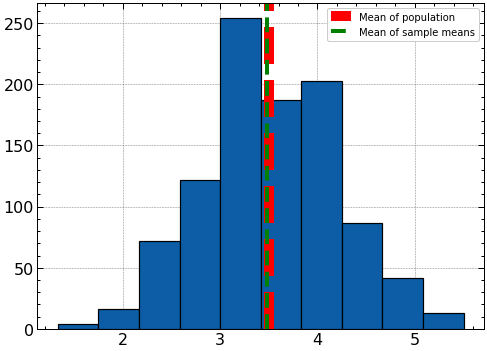

In [3]:
sample_means=[np.mean(np.random.choice(die, 6)) for i in range(1000)]
plt.hist(sample_means,edgecolor='black', linewidth=1.2)
plt.axvline(np.mean(die), lw=10, ls='--', color='red', label= 'Mean of population')
plt.axvline(np.mean(sample_means), lw=4, ls='--', color='green', label='Mean of sample means')
plt.legend(fontsize=10, title_fontsize=15)
plt.show()

# B. Hypothesis Testing Using Python Part 1

## 1. Warming up Z test: Two Tails Example

A machine is producing perfume bottles with the long term average of 150cc and the standard deviation of 2 cc. 4 bottles were picked and the average volume was found to be 153.8cc. Has the average volume **changed** from 150cc? Test with 95% confidence level.

Alternate Hypothesis: Mean volume != 150cc

Null Hypothesis: Mean volume = 150cc

Alpha = 1 - 0.95 = 0.05

Z calculated = (Observed mean - population mean) / standard error

$$
z_{cal}\;=\frac{(\overline x-\mu)}{\displaystyle\frac\sigma{\sqrt n}}\;
$$

$$
H_0:\;\mu=\;150\;cc\\H_a:\;\mu\neq\;150\;cc
$$

In [4]:
mean_pop=150
mean_obs=153.8
std=2
n=4
cl_percent=95

Z_cal = (mean_obs - mean_pop) / (std/np.sqrt(n))
Z_crit=np.abs(norm.ppf((100-cl_percent)/2/100))
p_val_Z=1-norm.cdf(abs(Z_cal))
print(f'P value = {np.round(p_val_Z, 3)}')

if Z_cal < -Z_crit or Z_cal > Z_crit  :
    print(f'Z calculated = {np.round(Z_cal, 3)} & |Z critical| = {np.round(Z_crit, 3)} \n***Reject the null hypothesis***')
else:
    print(f"Z calculated = {np.round(Z_cal, 3)} & Z critical = {np.round(Z_crit, 3)} \n***Don't reject the null hypothesis***")


P value = 0.0
Z calculated = 3.8 & |Z critical| = 1.96 
***Reject the null hypothesis***


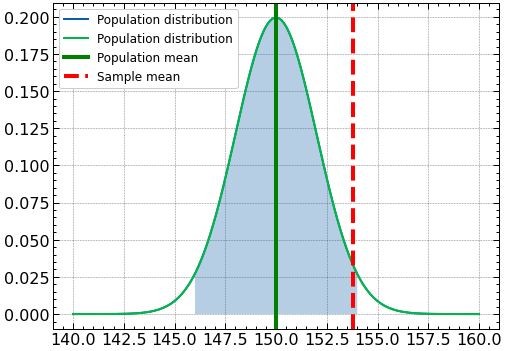

In [5]:
x=np.arange(140, 160, 0.01)
plt.plot(x, norm.pdf(x,mean_pop, std), label='Population distribution')
plt.plot(x, norm.pdf(x,mean_pop, std), label='Population distribution')
plt.axvline(mean_pop, lw=4, ls='-',color='green', label='Population mean')
plt.axvline(mean_obs, lw=4, ls='--',color='red', label='Sample mean')
plt.legend(fontsize=12, title_fontsize=15)
plt.fill_between(x, norm.pdf(x,mean_pop, std), 0, where=(x>mean_pop-2*std)&(x<mean_pop+2*std), alpha=0.3)
plt.show()

## 2. Warming up Z test: One Tail Example

A machine is producing perfume bottles with the long term average of 150cc and the standard deviation of 2 cc. 100 bottles were picked and the average volume was found to be 150.2 cc. Has the average volume **INCREASED** from 150cc? Test with 95% confidence level.

$$
H_0:\;\mu\leq\;150\;cc\\H_a:\;\mu>\;150\;cc
$$

In [6]:
mean_pop=150
mean_obs=150.2
std=2
n=100
cl_percent=95

Z_cal = (mean_obs - mean_pop) / (std/np.sqrt(n))
Z_crit=norm.ppf((cl_percent)/100)
p_val_Z=1-norm.cdf(abs(Z_cal))
print(f'P value = {np.round(p_val_Z, 3)}')

if Z_cal > Z_crit:
    print(f'Z calculated = {np.round(Z_cal, 3)} & Z critical = {np.round(Z_crit, 3)} \n***Reject the null hypothesis***')
    
else:
    print(f"Z calculated = {np.round(Z_cal, 3)} & Z critical = {np.round(Z_crit, 3)} \n***Don't reject the null hypothesis***")

P value = 0.159
Z calculated = 1.0 & Z critical = 1.645 
***Don't reject the null hypothesis***


## 3. Warming up T test: Two Tail Example

A machine is producing perfume bottles with the long term average of 150cc, 4 bottles were picked and the average volume was found to be 151 cc and std of the sample ($s$) bottles was 2 cc. Has the average volume **CHANGED** from 150cc? Test with 95% confidence level.

$$
t_{cal}=\frac{\left(\overline x-\mu\right)}{\displaystyle\frac s{\sqrt n}}
$$

$$
H_0:\;\mu=\;150\;cc\\H_a:\;\mu\neq\;150\;cc
$$

In [7]:
mean_pop=150
mean_obs=151
s=2
n=4
cl_percent=95

t_cal = (mean_obs - mean_pop) / (s/np.sqrt(n))
t_crit=np.abs(stats.t.ppf(q=(100-cl_percent)/2/100, df=n-1))
p_val_t= 1-stats.t.cdf(abs(t_cal),df=n-1)
print(f'P value = {np.round(p_val_t, 3)}')

if t_cal < -(t_crit) or t_cal > t_crit:
    print(f't calculated = {np.round(t_cal, 3)} & t critical = {np.round(t_crit, 3)} \n***Reject the null hypothesis***')
else:
    print(f"t calculated = {np.round(t_cal, 3)} & t critical = {np.round(t_crit, 3)} \n***Don't reject the null hypothesis***")

P value = 0.196
t calculated = 1.0 & t critical = 3.182 
***Don't reject the null hypothesis***


### IMPORTANT NOTES


#### norm.pdf(x, loc=0, scale=1) Probability density function.

#### norm.cdf(x, loc=0, scale=1)  Cumulative distribution function. (area to the left of x)

#### norm.sf(x, loc=0, scale=1) Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).

#### norm.ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles).

#### norm.isf(q, loc=0, scale=1) Inverse survival function (inverse of sf).

In [8]:
norm.cdf(1.96)

0.9750021048517795

In [9]:
norm.ppf(norm.cdf(1.96))

1.959999999999999

In [10]:
norm.sf(1.96)

0.024997895148220435

In [11]:
Z_crit_left = norm.ppf(0.025)
Z_crit_left

-1.9599639845400545

In [12]:
Z_crit_right = norm.isf(0.025)
Z_crit_right

1.9599639845400545

# C. Hypothesis Testing Using Python Part 2 

## 1. One Sample T test and Z test

### Example 1

In [13]:
df = pd.read_csv('Machine1.csv')
df.head()

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Machine 1,100.0,150.2031,2.018812,145.55,148.7175,150.285,151.5025,154.55


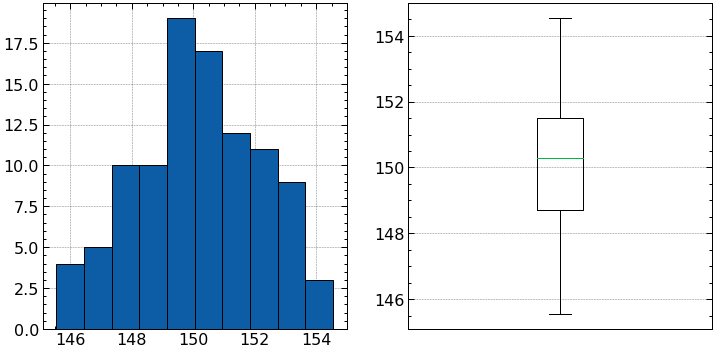

In [15]:
fig, axes= plt.subplots(1, 2, figsize=(12,6))
axes[0].hist(df, edgecolor='black')
axes[1].boxplot(df)
axes[1].set_xticks([])

plt.show()

In [16]:
#scipy T-test
'''
Calculate the T-test for the mean of ONE group of scores.

This is a two-sided test for the null hypothesis that the expected value
(mean) of a sample of independent observations `a` is equal to the given
population mean, `popmean`.
'''
stats.ttest_1samp(df['Machine 1'], 150)

Ttest_1sampResult(statistic=1.0060370247722599, pvalue=0.3168503751206756)

In [17]:
#statmodel Z test
weightstats.ztest(df['Machine 1'], value=150, alternative='two-sided' )

(1.0060370247722599, 0.3143977600779597)

### Example 2

In [18]:
volume = pd.DataFrame([148.5, 153.4, 150.9, 151.2])
volume.describe().T

,count,mean,std,min,25%,50%,75%,max
0,4.0,151.0,2.004994,148.5,150.3,151.05,151.75,153.4


In [19]:
stats.ttest_1samp(volume, 400)

Ttest_1sampResult(statistic=array([-248.37982469]), pvalue=array([1.43911817e-07]))

## 2. One Proportion Test

$$
z=\frac{p-p_0}{\sqrt{\displaystyle\frac{p_0(1-p_0)}n}}
$$

$$
H_0:p=p_0\\H_a:p\neq p_0\\\\
$$

Case 1:
Smoking rate in a town in a past was 21% ($p$),
100 samples were picked and found 14 smokers ($p_0$).
Has smoking habit changed?

In [20]:
result=stats.binomtest(14, 100, p=0.21, alternative='two-sided')
result

BinomTestResult(k=14, n=100, alternative='two-sided', proportion_estimate=0.14, pvalue=0.10920815720825927)

Case 2: Has smoking reduced? Left tail test

In [21]:
# Using Normal Approximation we rejected the Null, but using Binomial we failed to reject.
stats.binom_test(14, 100, p=0.21, alternative='less')

0.05042460221552124

In [22]:
df = pd.read_csv('Smokers.csv')
df.head()

,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No


In [23]:
df.describe().T

,count,unique,top,freq
Name,100,100,Person 1,1
Smokers,100,2,No,86


In [24]:
df['Smokers'].value_counts()

No     86
Yes    14
Name: Smokers, dtype: int64

In [25]:
smk=df.groupby(by='Smokers').count()
smk

,Name
Smokers,
No,86
Yes,14


In [26]:
stats.binom_test(smk.loc['Yes'][0], 100, 0.21)

0.10920815720825927

## 3. One Variance Test

Ex: A sample of 51 bottles was selected. The standard deviation of these
51 bottles was 2.35 cc ($s$). Has it **increased** from the established 2cc ($\sigma$)?
90% confidence level.

$$
H_0:\;s^2\leq \sigma^2\\H_a:\;s^2>\sigma^2\\\\
$$

$$\chi^2=\frac{(n-1)s^2}{\sigma^2}\\
$$

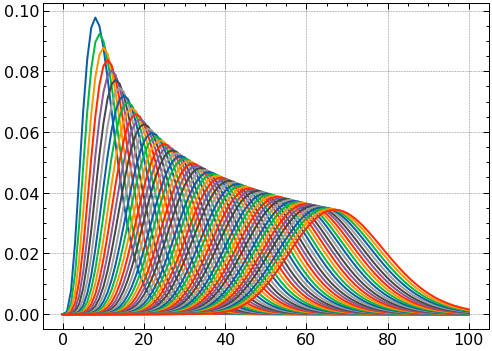

In [27]:
#chi2 plot
for i in np.arange(10,70):
    x_ax = np.linspace(0, 100, 101)
    y_ax = stats.chi2.pdf(x_ax, df=i)
    plt.plot(x_ax, y_ax);

In [28]:
# Chi Square Calculated
n=51
s=2.35
sigma=2
Chi_sq_cal = (51-1)*(s**2)/ (sigma**2)
Chi_sq_cal

69.03125000000001

In [29]:
# Chi Square Critical
# 10% area on the right for df=50 at chi-sqr
cl=90
Chi_sq_crit=stats.chi2.isf((100-cl)/100, n-1)
Chi_sq_crit

63.167121005726315

In [30]:
if Chi_sq_cal > Chi_sq_crit:
    print('Reject Null Hypothesis')
else:
    print("Don't reject Null Hypothesis")

Reject Null Hypothesis


# D. Hypothesis Testing Using Python Part 3

## 1. Two Sample Z Test

$$
H_0:\mu_1=\mu_2\\H_1:\mu_1\neq\mu_2
$$

$$
z_{cal}=\frac{{\overline x}_1-{\overline x}_2}{\sqrt{{\displaystyle\frac{\sigma_1^2}{n_1}}-{\displaystyle\frac{\sigma_2^2}{n_2}}}}
$$

### Example 1: Machine 1 vs Machine 2

In [31]:
df = pd.read_csv('Two Machines.csv')
df

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1
...,...,...
195,152.05,Machine 2
196,151.41,Machine 2
197,153.76,Machine 2
198,150.75,Machine 2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Volume   200 non-null    float64
 1   Machine  200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume,200.0,151.53835,2.180823,145.44,150.015,151.515,153.11,156.23


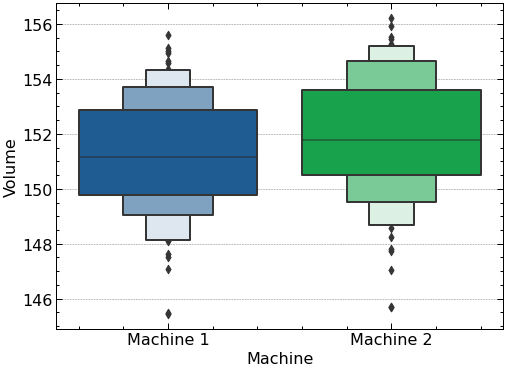

In [34]:
sns.boxenplot(data=df, x='Machine', y='Volume');

In [35]:
m1 = df[df['Machine'] == 'Machine 1']['Volume']
m2 = df[df['Machine'] == 'Machine 2']['Volume']

In [36]:
print(m1.mean(), m1.std(ddof=1))

151.20390000000006 2.1136511064979473


In [37]:
print(m2.mean(), m2.std(ddof=1))

151.87279999999998 2.2060193502635848


In [38]:
weightstats.ztest(m1, m2)

(-2.189406040190184, 0.028567341032618248)

In [39]:
stats.ttest_ind(m1, m2, equal_var=True)

Ttest_indResult(statistic=-2.189406040190184, pvalue=0.029736299645472124)

### Example 2: Male vs Female Tips

In [40]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


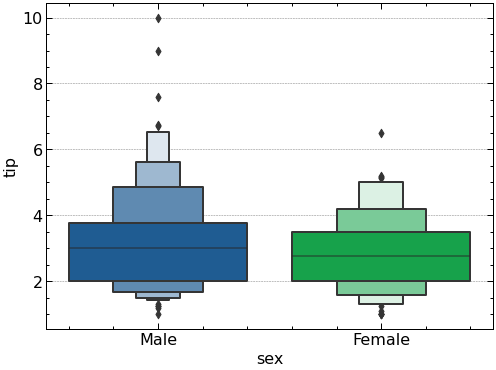

In [41]:
sns.boxenplot(data=tips, x='sex', y='tip');

In [42]:
tm = tips[tips['sex']=='Male']['tip']
tf = tips[tips['sex']=='Female']['tip']
weightstats.ztest(tm, tf)

(1.3878597054212687, 0.1651797698624794)

In [43]:
stats.ttest_ind(tm, tf, equal_var=True)

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

### Example 3: Lunch vs Dinner Tips

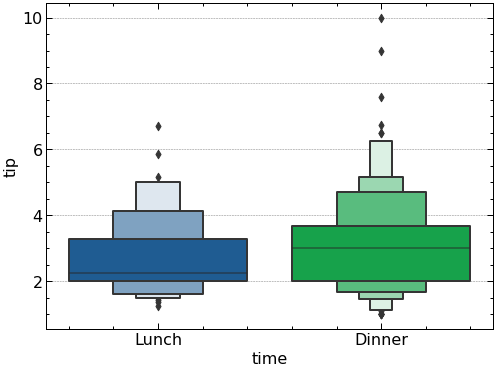

In [44]:
sns.boxenplot(data=tips, x='time', y='tip');

In [45]:
tl = tips[tips['time']=='Lunch']['tip']
td = tips[tips['time']=='Dinner']['tip']
weightstats.ztest(tl, td)

(-1.9062569301202392, 0.05661687925222567)

In [46]:
stats.ttest_ind(tl, td, equal_var=True)

Ttest_indResult(statistic=-1.9062569301202392, pvalue=0.05780153475171558)

## 2. Two Sample t Test (Equal Variance)

$$
H_0:\mu_1=\mu_2\\H_a:\mu_1\neq\mu_2
$$


$$
t_{cal}=\frac{{\overline x}_1-{\overline x}_2}{s_p\sqrt{{\displaystyle\frac1{n_1}}+{\displaystyle\frac1{n_2}}}}
$$

$$
s_p^2=\frac{(n_1-1)s_1^2\;+\;(n_2-1)s_2^2}{n_1+n_2-2}
$$

$$
d_f=n_1-1+n_2-1
$$

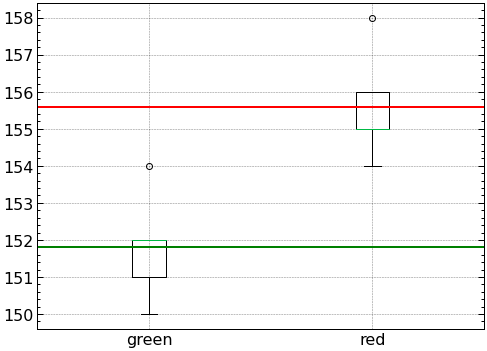

In [50]:
green = [150, 152, 154, 152, 151]
red = [156, 155, 158, 155, 154]
plt.boxplot([green,red])
plt.xticks([1,2], ['green', 'red'])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.axhline(np.mean(np.array(green)), color='green')
plt.axhline(np.mean(np.array(red)), color='red');

In [48]:
stats.ttest_ind(m1, m2, equal_var=True)

Ttest_indResult(statistic=-2.189406040190184, pvalue=0.029736299645472124)

## 3. Two Sample t Test (Unequal Variance)

$$
H_0:\mu_1=\mu_2\\H_a:\mu_1\neq\mu_2
$$


$$
t_{cal}=\frac{{\overline x}_1-{\overline x}_2}{\sqrt{{\displaystyle\frac{s_1^2}{n_1}}+{\displaystyle\frac{s_2^2}{n_2}}}}
$$

$$
df=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}\right)^2}{{\displaystyle\frac{\left(\frac{s_1^2}{n_1}\right)^2}{(n_1-1)}}+{\displaystyle\frac{\left(\frac{s_2^2}{n_2}\right)^2}{(n_2-1)}}}
$$

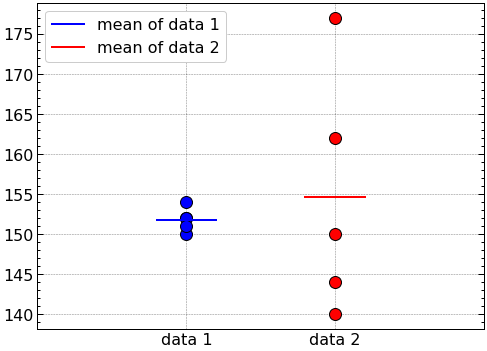

In [56]:
data_1 = [150, 152, 154, 152, 151]
data_2 = [144, 162, 177, 150, 140]
plt.plot(np.ones(len(data_1)), data_1, 'ko',markerfacecolor='blue', markersize=12)
plt.plot(np.ones(len(data_2))+1, data_2, 'ko',markerfacecolor='red', markersize=12)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.plot([1-0.2, 1+0.2], [np.mean(np.array(data_1)),np.mean(np.array(data_1))], color='blue', label='mean of data 1')
plt.plot([2-0.2, 2+0.2], [np.mean(np.array(data_2)),np.mean(np.array(data_2))], color='red', label='mean of data 2')
plt.xlim(0, 3)
plt.xticks(list(range(3+1)), ['','data 1', 'data 2','' ])
plt.legend();

In [57]:
stats.ttest_ind(data_1, data_2, equal_var=False)

Ttest_indResult(statistic=-0.4146442144313621, pvalue=0.699289145758865)

## 4. Paired t Test 

same individuals, measuring twice: before and after
$$
H_0:\;\mu_{before}=\mu_{after}\\H_a:\;\mu_{before}\neq\mu_{after}
$$

$$
t_{cal}=\frac{\overline{\triangle d}}{\displaystyle\frac{s_{\triangle d}}{\sqrt n}}
$$
$$
\triangle d=(x_{after}-x_{before})
$$
$$
df=n-1
$$

In [58]:
data_before = [120, 122, 143, 100, 109]
data_after = [122, 120, 141, 109, 109]
df=pd.DataFrame([data_before, data_after]).T
df.columns=['before', 'after']
df

,before,after
0,120,122
1,122,120
2,143,141
3,100,109
4,109,109


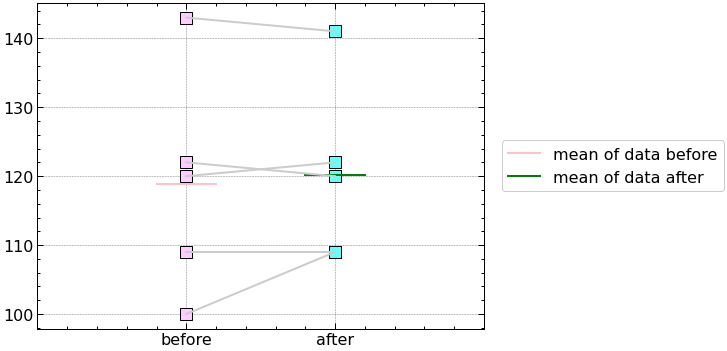

In [59]:
plt.plot(np.ones(len(df['before'])), df['before'], 'ks',markerfacecolor=[1,.8,1], markersize=12)
plt.plot(np.ones(len(df['after']))+1, df['after'], 'ks',markerfacecolor=[.39,1,1], markersize=12)
plt.plot([1-0.2, 1+0.2], [np.mean(np.array(df['before'])),np.mean(np.array(df['before']))], color='pink', label='mean of data before')
plt.plot([2-0.2, 2+0.2], [np.mean(np.array(df['after'])),np.mean(np.array(df['after']))], color='green', label='mean of data after')
plt.xlim(0, 3)

plt.xticks([])
plt.xticks([1,2], ['before', 'after'])
for i in df.index:
    plt.plot([1, 2],[df['before'][i],df['after'][i]],color=[.8,.8,.8])
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0);

In [60]:
stats.ttest_rel(df['before'], df['after'])# related t test

Ttest_relResult(statistic=-0.6864064729836442, pvalue=0.5301776477578163)

## 5. Two Proportions Test

### Test for no difference between population

$$
H_0:\;p_1-p_2=0\\H_a:\;p_1-p_2\neq0
$$

$$
\;z_{cal}=\frac{{\widehat p}_1-{\widehat p}_2}{\sqrt{\overline p(1-\overline p)\left({\displaystyle\frac1{n_1}}+{\displaystyle\frac1{n_2}}\right)}}
$$

$$
\overline p=\frac{n_1{\widehat p}_1+n_2{\widehat p}_2}{\left(n_1+n_2\right)}\\
$$

Test if normality can be assumed?
$$
n_1{\widehat p}_1\geq10\\n_1(1-{\widehat p}_1)\geq10\\n_2{\widehat p}_2\geq10\\n_2(1-{\widehat p}_2)\geq10\\\\
$$

From vendor A we test 200 pieces and find 30 defectives. From vendor B we test 100 pieces and we find 10 defectives. Is there significant difference in the quality of these two vendors? Use 95% confidence level. 

In [61]:
proportion.test_proportions_2indep(30, 200, 10, 100)
# Manual calculation using pooled method returned the Z value as 1.20, while we are getting 1.14 here)
# Various methos are there. method='score' gives approximately the same result as manual calculation.

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.145433008876846
pvalue = 0.2520298311822946
compare = 'diff'
method = 'agresti-caffo'
diff = 0.04999999999999999
ratio = 1.4999999999999998
odds_ratio = 1.588235294117647
variance = 0.001586401953652147
alternative = 'two-sided'
value = 0
tuple = (1.145433008876846, 0.2520298311822946)

In [62]:
proportion.test_proportions_2indep(30, 200, 10, 100, method='score')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.1989578808281796
pvalue = 0.2305443235633593
compare = 'diff'
method = 'score'
variance = 0.001739130434782609
alternative = 'two-sided'
prop1_null = 0.13333333333333333
prop2_null = 0.13333333333333333
tuple = (1.1989578808281796, 0.2305443235633593)
diff = 0.04999999999999999
ratio = 1.4999999999999998
odds_ratio = 1.588235294117647
value = 0

## 6. Two Variances Test

$$
H_0:\sigma_1^2=\sigma_2^2\\H_a:\sigma_1^2\neq\sigma_2^2\\
$$

$$
F_{cal}=\frac{s_1^2}{s_2^2}
$$

$$
df_{numerator}=n_1-1\\df_{denominator}=n_2-1
$$

We took 8 samples from machine A and the variance was 1.21. For machine B we took 5 samples and the variance was 11. Is there difference in variance at 90% confidence level?

In [63]:
var_1=11
n_1=5

var_2=1.21
n_2=8

cl=90
F_cal=var_1/var_2
F_cal

9.090909090909092

In [64]:
F_cri_right = f.isf(((100-cl)/2)/100, n_1-1, n_2-1)
F_cri_right

4.120311726897633

In [65]:
F_cri_left = f.isf((100-(100-cl)/2)/100,n_1-1, n_2-1)
F_cri_left

0.1640901524729093

### Batlett Test

In [66]:
m1 = [150, 150, 151, 148, 151, 152, 149, 150]
np.std(m1)

1.165922381636102

In [67]:
m2 = [135, 152, 154, 169, 157]
np.std(m2)

10.9288608738514

In [68]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html
stats.bartlett(m1,m2)

BartlettResult(statistic=19.105727631632714, pvalue=1.2367317910523616e-05)

# E. Hypothesis Testing Using Python Part 4

##  1. ANOVA

In [69]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]
stats.f_oneway(m1, m2, m3)

F_onewayResult(statistic=22.264705882352935, pvalue=3.2374085509077445e-05)

- F Calculated in manual calculation was 22.24
- Numerator df = 2
- Denominator df = 15
- We can find p-value, as the area to the right of 22.24

In [70]:
stats.f.sf(22.2645, 2, 15)

3.237576504411197e-05

In [71]:
oneway.anova_oneway((m1, m2, m3), use_var = 'equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

### Comparing cars mpg from three countries

In [72]:
pd.DataFrame(sns.get_dataset_names()).T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,anagrams,anscombe,attention,brain_networks,car_crashes,diamonds,dots,dowjones,exercise,flights,...,glue,healthexp,iris,mpg,penguins,planets,seaice,taxis,tips,titanic


In [73]:
mpg = sns.load_dataset("mpg")
mpg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [74]:
mpg.groupby('origin').mean()['mpg']

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [75]:
mpg.groupby(by=['origin', 'cylinders']).mean()

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
europe 4          28.411111    104.222222   78.311475  2330.015873   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
japan  3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   
usa    4          27.840278    124.284722   80.956522  2437.166667   
       6          19.663514    226.283784   99.671233  3213.905405   
       8          14.963107    345.009709  158.300971  4114.718447   

                  acceleration  model_year  
origin cylinders                            
europe 4             16.722222   75.507937  
       5             18.633333   79.000000  
       6             16.425000   78.250000  
japan  3             13.250000   75.500000  
       4             16.569565   77.507246  
       6             13.550000   78.000000  
usa    4             16.526389   78.027778  
       6             16.474324   75.635135  
       8             12.955340   73.902913

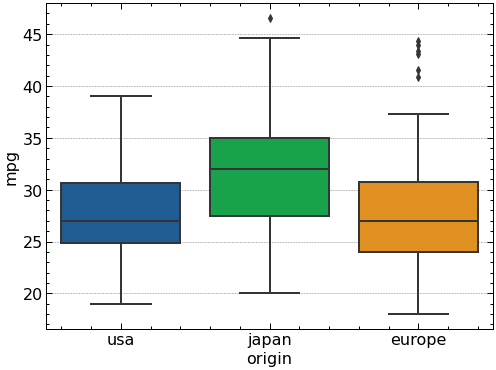

In [76]:
sns.boxplot(data=mpg, x='origin', y=mpg[mpg['cylinders'] == 4]['mpg']);

In [77]:
eu = mpg[(mpg['cylinders'] == 4) & (mpg['origin'] == 'europe')]['mpg']
jp = mpg[(mpg['cylinders'] == 4) & (mpg['origin'] == 'japan')]['mpg']
us = mpg[(mpg['cylinders'] == 4) & (mpg['origin'] == 'usa')]['mpg']

In [78]:
stats.f_oneway(eu, jp, us)

F_onewayResult(statistic=9.411845545485601, pvalue=0.00012379894210177303)

#  2. Goodness of Fit Test

## Coin

In [79]:
# Flipping a coin
exp = [50, 50]
obs = [40, 60]

In [80]:
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=4.0, pvalue=0.04550026389635857)

In [81]:
# By default expected is equally likely
stats.chisquare(obs)

Power_divergenceResult(statistic=4.0, pvalue=0.04550026389635857)

## Shirt Sale

In [82]:
exp_r = pd.Series([0.1, 0.2, 0.4, 0.3])
obs = pd.Series([25, 41, 91, 68])
exp = exp_r * sum(obs)
exp

0    22.5
1    45.0
2    90.0
3    67.5
dtype: float64

In [83]:
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=0.648148148148148, pvalue=0.8853267818237286)

#  3. Contingency Tables

## Shift vs Worker

In [84]:
sh_op = np.array([[22, 26, 23], [28, 62, 26], [72, 22, 66]])
sh_op

array([[22, 26, 23],
       [28, 62, 26],
       [72, 22, 66]])

In [85]:
stats.chi2_contingency(sh_op)

(50.09315721064659,
 3.4527076339398545e-10,
 4,
 array([[24.96253602, 22.50720461, 23.53025937],
        [40.78386167, 36.77233429, 38.44380403],
        [56.25360231, 50.7204611 , 53.0259366 ]]))

In [86]:
sh_op_df = pd.DataFrame(sh_op, columns=['Shift1', 'Shift2', 'Shift3'], index=['Worker1', 'Worker2', 'Worker3'])
sh_op_df

,Shift1,Shift2,Shift3
Worker1,22,26,23
Worker2,28,62,26
Worker3,72,22,66


In [87]:
stats.chi2_contingency(sh_op_df)

(50.09315721064659,
 3.4527076339398545e-10,
 4,
 array([[24.96253602, 22.50720461, 23.53025937],
        [40.78386167, 36.77233429, 38.44380403],
        [56.25360231, 50.7204611 , 53.0259366 ]]))

## Day vs Smokers

In [88]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [89]:
tips.groupby(by = ['day', 'smoker']).count()

total_bill  tip  sex  time  size
day  smoker                                  
Thur Yes             17   17   17    17    17
     No              45   45   45    45    45
Fri  Yes             15   15   15    15    15
     No               4    4    4     4     4
Sat  Yes             42   42   42    42    42
     No              45   45   45    45    45
Sun  Yes             19   19   19    19    19
     No              57   57   57    57    57

In [90]:
day_smoker = tips.pivot_table(index='day', columns='smoker', aggfunc='count')['tip']
day_smoker

smoker,Yes,No
day,,
Thur,17,45
Fri,15,4
Sat,42,45
Sun,19,57


In [91]:
stats.chi2_contingency(day_smoker)

(25.787216672396262,
 1.0567572499836523e-05,
 3,
 array([[23.63114754, 38.36885246],
        [ 7.24180328, 11.75819672],
        [33.15983607, 53.84016393],
        [28.96721311, 47.03278689]]))